<h1>Scraping the Toronto Data</h1>

We are going to use the BeautifulSoup package to scrap the Wikipedia page with the [Toronto Postal Codes](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). The first step is importing the necessary libraries.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

The next steps are to specify the url and send a request to obtain the HTML code of the Wikipedia page.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

r = requests.get(url)

html_doc = r.text

Now I create a BeautifulSoup object, soup, to read the source code of the page.

In [3]:
soup = BeautifulSoup(html_doc)

pretty_soup= soup.prettify()

print(pretty_soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XovcGQpAEKcAAtbP85wAAAAG","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":949497198,"wgRevisionId":949497198,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

All the information that we need is under class Wikitable, so we have to find this class in the HTML script.

In [4]:
table = soup.find('table', class_='wikitable')
table

<table class="wikitable">
<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park / Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor / Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park / Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern / Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>East York
<

The next steps are:
- Find all the table rows
- Get the text of each row using a for loop. The result will be a list of strings.
- Delete the first string, the headers.
- Split every string in the newline (\\n) character and create a list of lists 

In [5]:
tr = table.find_all('tr')
tr[0]

<tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>

In [6]:
rows = [t.get_text() for t in tr]
del rows[0]
clean_rows = []
for row in rows:
    row = row.split('\n\n')
    clean_rows.append(row)

Now we convert the list of lists in a dataframe

In [7]:
df = pd.DataFrame(clean_rows)
df

,0,1,2,3
0,\nM1A,Not assigned,\n,None
1,\nM2A,Not assigned,\n,None
2,\nM3A,North York,Parkwoods\n,None
3,\nM4A,North York,Victoria Village\n,None
4,\nM5A,Downtown Toronto,Regent Park / Harbourfront\n,None
...,...,...,...,...
175,\nM5Z,Not assigned,\n,None
176,\nM6Z,Not assigned,\n,None
177,\nM7Z,Not assigned,\n,None
178,\nM8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...,None


We drop the last column

In [8]:
postal_codes = df.drop(3, axis=1)
postal_codes

,0,1,2
0,\nM1A,Not assigned,\n
1,\nM2A,Not assigned,\n
2,\nM3A,North York,Parkwoods\n
3,\nM4A,North York,Victoria Village\n
4,\nM5A,Downtown Toronto,Regent Park / Harbourfront\n
...,...,...,...
175,\nM5Z,Not assigned,\n
176,\nM6Z,Not assigned,\n
177,\nM7Z,Not assigned,\n
178,\nM8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


We assign names to the colums.

In [9]:
postal_codes = postal_codes.rename(columns={0: 'Postal Code', 1: 'Borough', 2 : 'Neighborhood'})
postal_codes.head()

,Postal Code,Borough,Neighborhood
0,\nM1A,Not assigned,\n
1,\nM2A,Not assigned,\n
2,\nM3A,North York,Parkwoods\n
3,\nM4A,North York,Victoria Village\n
4,\nM5A,Downtown Toronto,Regent Park / Harbourfront\n


If we observe the first rows of the dataframe, we see that is necessary to perform some data cleaning. We have to strip the newlines (\\n), replace the slash (/) with commas in the Neighborhood column and drop cells with a borough that is Not assigned.

In [10]:
postal_codes = postal_codes.replace('\n','', regex=True)
postal_codes['Neighborhood'] = postal_codes['Neighborhood'].replace('/', ', ', regex=True)
postal_codes = postal_codes[postal_codes.Borough != 'Not assigned'].reset_index(drop=True)
postal_codes.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


We use the methods .isna() and .any() to check for null values.

In [11]:
postal_codes.isna().any()

Postal Code     False
Borough         False
Neighborhood    False
dtype: bool

Check the shape of postal_codes.

In [12]:
postal_codes.shape

(103, 3)

The dataframe has 103 rows.

<h1>Using geopy.geocoder to get the coordinates of each Neighborhood</h1>


First we import the libraries.

In [13]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent toronto_explorer, as shown below.

In [14]:
geolocator = Nominatim(user_agent="toronto_explorer")

After trying several times to use geopy to get the coordinates with no success, we use the CSV file provided.

In [15]:
toronto_coordinates = pd.read_csv('Geospatial_Coordinates.csv')
toronto_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


We merge the two dataframes.

In [16]:
toronto_city = postal_codes.merge(toronto_coordinates, left_on= 'Postal Code', right_on='Postal Code')
toronto_city.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


<h1> Exploring and clustering neighborhoods in Toronto</h1>

We start, as always, importing the libraries.

In [17]:
import numpy as np 
import json 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

print('Libraries imported.')

Libraries imported.


Next, we get the coordinates of Toronto.

In [23]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer", timeout=100)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


Now we can use folium to create a map of Toronto and their postal codes.

In [24]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, postal_code, borough, neighborhood in zip(toronto_city['Latitude'], toronto_city['Longitude'], toronto_city['Postal Code'], toronto_city['Borough'], toronto_city['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

To simplify the exercise, we are going to use only those Boroughs that contain the word Toronto.

In [25]:
toronto_boroughs = toronto_city[toronto_city['Borough'].str.contains('Toronto', regex=True)]
toronto_boroughs = toronto_boroughs.reset_index(drop=True)
toronto_boroughs

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259


We create a map that only include the neighborhoods of Downtown Toronto, Central Toronto, East Toronto and West Toronto.

In [26]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_boroughs['Latitude'], toronto_boroughs['Longitude'], toronto_boroughs['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them. These are our credentials.

In [27]:
CLIENT_ID = 'R4MJGJXEW111CBDTP0TWAICQQEXH3HXVJXFOG2WMBGMFWFMP' 
CLIENT_SECRET = 'F2LV0YRLWGRKEKS5UOKROZPBZDSHNCUIKUUUMCWLU5V41OY2' 
VERSION = '20180605'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R4MJGJXEW111CBDTP0TWAICQQEXH3HXVJXFOG2WMBGMFWFMP
CLIENT_SECRET:F2LV0YRLWGRKEKS5UOKROZPBZDSHNCUIKUUUMCWLU5V41OY2


To get the venues, we a function that for each neighborhood:
- creates the API request URL.
- makes the GET request.
- returns only the information that we need for each venue.

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
toronto_venues = getNearbyVenues(names=toronto_boroughs['Neighborhood'],
                                   latitudes=toronto_boroughs['Latitude'],
                                   longitudes=toronto_boroughs['Longitude']
                                  )



Regent Park ,  Harbourfront
Queen's Park ,  Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond ,  Adelaide ,  King
Dufferin ,  Dovercourt Village
Harbourfront East ,  Union Station ,  Toronto Islands
Little Portugal ,  Trinity
The Danforth West ,  Riverdale
Toronto Dominion Centre ,  Design Exchange
Brockton ,  Parkdale Village ,  Exhibition Place
India Bazaar ,  The Beaches West
Commerce Court ,  Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park ,  The Junction South
North Toronto West
The Annex ,  North Midtown ,  Yorkville
Parkdale ,  Roncesvalles
Davisville
University of Toronto ,  Harbord
Runnymede ,  Swansea
Moore Park ,  Summerhill East
Kensington Market ,  Chinatown ,  Grange Park
Summerhill West ,  Rathnelly ,  South Hill ,  Forest Hill SE ,  Deer Park
CN Tower ,  King and Spadina ,  Railway Lands ,  Harbourfront West ,  Bathurst Quay ,  South

Let's check the size of the resulting dataframe

In [30]:
toronto_venues.shape

(866, 7)

In [31]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


We check if there is a Venue Category called 'Neighborhood'

In [32]:
toronto_venues[toronto_venues['Venue Category'] == 'Neighborhood']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
123,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
213,"Richmond , Adelaide , King",43.650571,-79.384568,Downtown Toronto,43.653232,-79.385296,Neighborhood
249,"Harbourfront East , Union Station , Toronto ...",43.640816,-79.381752,Harbourfront,43.639526,-79.380688,Neighborhood
449,Studio District,43.659526,-79.340923,Leslieville,43.662070,-79.337856,Neighborhood


We have to drop those rows to avoid problems and export the dataframe to a CSV file.

In [33]:
toronto_venues = toronto_venues[toronto_venues['Venue Category'] != 'Neighborhood']

In [34]:
toronto_venues.to_csv('toronto_venues.csv')

In [68]:
toronto_venues = pd.read_csv('toronto_venues.csv', index_col='Unnamed: 0')
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


Let's check how many venues were returned for each neighborhood

In [69]:
toronto_grouped = toronto_venues.groupby('Neighborhood').count()
toronto_grouped.sort_values('Venue', ascending= False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,30,30,30,30,30,30
"Garden District, Ryerson",30,30,30,30,30,30
"Toronto Dominion Centre , Design Exchange",30,30,30,30,30,30
"The Danforth West , Riverdale",30,30,30,30,30,30
Stn A PO Boxes,30,30,30,30,30,30
"St. James Town , Cabbagetown",30,30,30,30,30,30
St. James Town,30,30,30,30,30,30
"Runnymede , Swansea",30,30,30,30,30,30
"Regent Park , Harbourfront",30,30,30,30,30,30


We can see that some neighborhood have very few venues and that can affect the analysis, so we are going to use only the neighborhoods with more than 4 venues.

In [70]:
temp = toronto_grouped.sort_values('Venue', ascending= False)
f_venues = temp[temp['Venue'] < 8]
f_venues = f_venues.index.to_list()
f_venues

['Forest Hill North & West',
 'Rosedale',
 'Lawrence Park',
 'The Beaches',
 'Moore Park ,  Summerhill East',
 'Roselawn']

In [71]:
toronto_venues = toronto_venues[~toronto_venues.Neighborhood.isin(f_venues)]

In [81]:
toronto_boroughs = toronto_boroughs[~toronto_boroughs.Neighborhood.isin(f_venues)]

Let's find out how many unique categories can be curated from all the returned venues

In [82]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 182 uniques categories.


Now we use one hor encoding to transform all the unique categories into numbers.

In [83]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.head()

,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then we merge toronto_onehot to the 'Neighborhood' column of toronto_venues. 

In [84]:
toronto_onehot = pd.concat([toronto_venues['Neighborhood'], toronto_onehot], axis=1)

toronto_onehot

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,Business reply mail Processing CentrE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,Business reply mail Processing CentrE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,Business reply mail Processing CentrE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864,Business reply mail Processing CentrE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [85]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton , Parkdale Village , Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Business reply mail Processing CentrE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower , King and Spadina , Railway Lands ...",0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Commerce Court , Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's print each neighborhood along with the top 5 most common venues

In [86]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.07
2              Bakery  0.07
3                Café  0.07
4  Seafood Restaurant  0.07


----Brockton ,  Parkdale Village ,  Exhibition Place----
                   venue  freq
0                   Café  0.14
1            Coffee Shop  0.09
2         Breakfast Spot  0.09
3  Performing Arts Venue  0.05
4      Convenience Store  0.05


----Business reply mail Processing CentrE----
           venue  freq
0     Smoke Shop  0.06
1  Auto Workshop  0.06
2     Skate Park  0.06
3        Brewery  0.06
4            Spa  0.06


----CN Tower ,  King and Spadina ,  Railway Lands ,  Harbourfront West ,  Bathurst Quay ,  South Niagara ,  Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3           Airport  0.06
4               Bar  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.23
1          

Now we can run *k*-means in toronto_grouped to cluster the neighborhoods into 5 clusters.

In [87]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 1, 1, 0, 2, 0, 0, 0, 3])

We add the cluster labels to toronto_boroughs

In [88]:
toronto_boroughs.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_boroughs

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,1,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
5,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,0,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,0,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
9,0,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259
10,3,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto ...",43.640816,-79.381752


Now we create the map with the clusters.

In [89]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_boroughs['Latitude'], toronto_boroughs['Longitude'], toronto_boroughs['Neighborhood'], toronto_boroughs['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see that most neighborhoods belong to cluster 0, let's check which are the 10 most common venues for each cluster. First we merge toronto_boroughs and toronto venues.

In [90]:
toronto_merged = toronto_boroughs.join(toronto_venues.set_index('Neighborhood'), on='Neighborhood')
toronto_merged

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
...,...,...,...,...,...,...,...,...,...,...,...,...
38,4,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558,43.662744,-79.321558,Jonathan Ashbridge Park,43.664702,-79.319898,Park
38,4,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558,43.662744,-79.321558,The Ten Spot,43.664815,-79.324213,Spa
38,4,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558,43.662744,-79.321558,Olliffe On Queen,43.664503,-79.324768,Butcher
38,4,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558,43.662744,-79.321558,Greenwood Cigar & Variety,43.664538,-79.325379,Smoke Shop


Now we subset the dataframe by clusters

In [91]:
cluster_0 = toronto_merged[toronto_merged['Cluster Labels'] == 0]
cluster_0

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65426,-79.360636,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65426,-79.360636,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65426,-79.360636,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65426,-79.360636,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
0,0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65426,-79.360636,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
...,...,...,...,...,...,...,...,...,...,...,...,...
37,0,M4Y,Downtown Toronto,Church and Wellesley,43.66586,-79.383160,43.66586,-79.383160,Piedmont Coffee Bar,43.668286,-79.382520,Coffee Shop
37,0,M4Y,Downtown Toronto,Church and Wellesley,43.66586,-79.383160,43.66586,-79.383160,Holy Chuck,43.665241,-79.384728,Burger Joint
37,0,M4Y,Downtown Toronto,Church and Wellesley,43.66586,-79.383160,43.66586,-79.383160,Black Eagle,43.664085,-79.380098,Gay Bar
37,0,M4Y,Downtown Toronto,Church and Wellesley,43.66586,-79.383160,43.66586,-79.383160,Toronto Hemp Company,43.668419,-79.385848,Smoke Shop


We count the venue categories and plot them.

In [92]:
venues_0 = cluster_0['Venue Category'].value_counts()

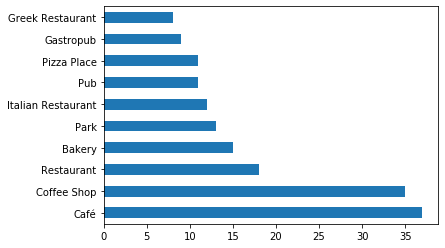

In [93]:
import matplotlib.pyplot as plt
venues_0.head(10).plot(kind='barh')

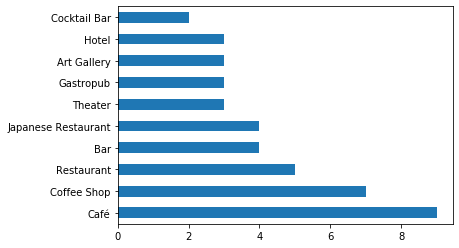

In [94]:
cluster_1 = toronto_merged[toronto_merged['Cluster Labels'] == 1]

venues_1 = cluster_1['Venue Category'].value_counts()

venues_1.head(10).plot(kind='barh')

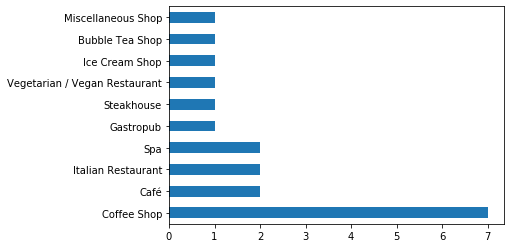

In [95]:
cluster_2 = toronto_merged[toronto_merged['Cluster Labels'] == 2]

venues_2 = cluster_2['Venue Category'].value_counts()

venues_2.head(10).plot(kind='barh')

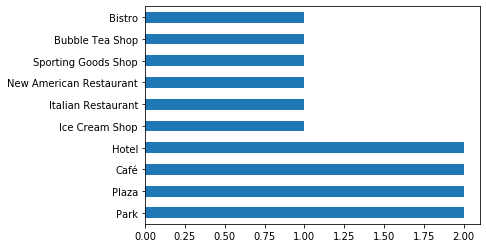

In [96]:
cluster_3 = toronto_merged[toronto_merged['Cluster Labels'] == 3]

venues_3 = cluster_3['Venue Category'].value_counts()

venues_3.head(10).plot(kind='barh')

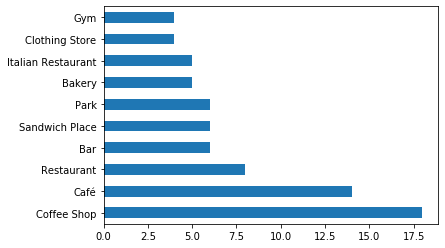

In [97]:
cluster_4 = toronto_merged[toronto_merged['Cluster Labels'] == 4]

venues_4= cluster_4['Venue Category'].value_counts()

venues_4.head(10).plot(kind='barh')

<h2>Final Report</h2>

Based on the analysis of the data:
- Most neighborhoods have coffee shops, cafés, bars and restaurants. 
- Greek restaurants are located in cluster 0 neighborhoods.
- Theaters and art galleries are in cluster 1 neighborhoods.
- There's a Vegetarian restaurant in cluster 2.
- The only 'New American Restaurant' is in cluster 3.
- Gyms are in cluster 4.